In [43]:
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

import matplotlib as mpl

In [44]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Donde guardar las figuras
PROGECT_ROOT_DIR = "."
CHAPTER_ID = "research"
IMAGES_PATH = os.path.join(PROGECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
housing = pd.read_csv('completed_houses.csv')
housing.head()

,id,active,last_active_check_date,post_time,operation,title,is_penthouse,is_duplex,is_flat,is_studio,...,is_needs_renovation,is_good_condition,latitude,longitude,location_1,location_2,location_3,location_4,zone_url,price
0,103310523,1,2023-12-11 17:15:44.050142,2023-12-07 12:10:42.977000,1,chalet adosado en venta en el paso,0,1,0,0,...,0,1,28.097803,-15.700018,"Gran Canaria, Las Palmas",Agaete,El Paso,El Paso,https://www.idealista.com/venta-viviendas/las-...,299999.0
1,88915057,1,2023-12-11 17:15:44.129731,2023-12-07 12:10:45.072000,1,piso en venta en calle real,0,0,1,0,...,0,1,27.985491,-15.778576,"Gran Canaria, Las Palmas",Aldea de San Nicolás,Calle Real,Calle Real,https://www.idealista.com/venta-viviendas/las-...,84000.0
2,100357652,1,2023-12-11 17:15:44.041623,2023-12-07 12:10:48.361000,1,chalet pareado en venta en calle las palmeras,0,0,0,0,...,0,1,27.980494,-15.781108,"Gran Canaria, Las Palmas",Aldea de San Nicolás,Calle Las Palmeras,Calle Las Palmeras,https://www.idealista.com/venta-viviendas/las-...,127000.0
3,102887484,1,2023-12-11 17:15:44.069094,2023-12-07 12:10:53.736000,1,chalet adosado en venta en calle isla de cuba,0,0,0,0,...,0,1,27.980649,-15.779978,"Gran Canaria, Las Palmas",Aldea de San Nicolás,Calle Isla de Cuba,Calle Isla de Cuba,https://www.idealista.com/venta-viviendas/las-...,106420.0
4,101931251,1,2023-12-11 17:15:43.949173,2023-12-07 12:11:00.203000,1,casa o chalet independiente en venta en camin...,0,0,0,0,...,0,1,28.046284,-15.727938,"Gran Canaria, Las Palmas",Agaete,"Camino Vial, 5","Camino Vial, 5",https://www.idealista.com/venta-viviendas/las-...,150000.0


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6132 entries, 0 to 6131
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6132 non-null   int64  
 1   active                  6132 non-null   int64  
 2   last_active_check_date  6132 non-null   object 
 3   post_time               6132 non-null   object 
 4   operation               6132 non-null   int64  
 5   title                   6132 non-null   object 
 6   is_penthouse            6132 non-null   int64  
 7   is_duplex               6132 non-null   int64  
 8   is_flat                 6132 non-null   int64  
 9   is_studio               6132 non-null   int64  
 10  is_apartment            6132 non-null   int64  
 11  is_loft                 6132 non-null   int64  
 12  is_ground_floor         6132 non-null   int64  
 13  is_semi_detached_house  6132 non-null   int64  
 14  is_townhouse            6132 non-null   

# Clenning and preparing the data

## Null values

In [4]:
housing.isnull().sum()

id                           0
active                       0
last_active_check_date       0
post_time                    0
operation                    0
title                        0
is_penthouse                 0
is_duplex                    0
is_flat                      0
is_studio                    0
is_apartment                 0
is_loft                      0
is_ground_floor              0
is_semi_detached_house       0
is_townhouse                 0
is_bungalow                  0
is_country_house             0
is_large_country_house       0
is_villa                     0
is_terraced_house            0
rooms_number                 0
baths_number                 0
floors                       0
floor_number                 0
built_area                   0
usable_area               2846
constructed_area             0
built_year                3152
plot_area                 4555
has_lift                     0
has_parking                  0
has_garden                   0
has_swim

Saving figure missing_values


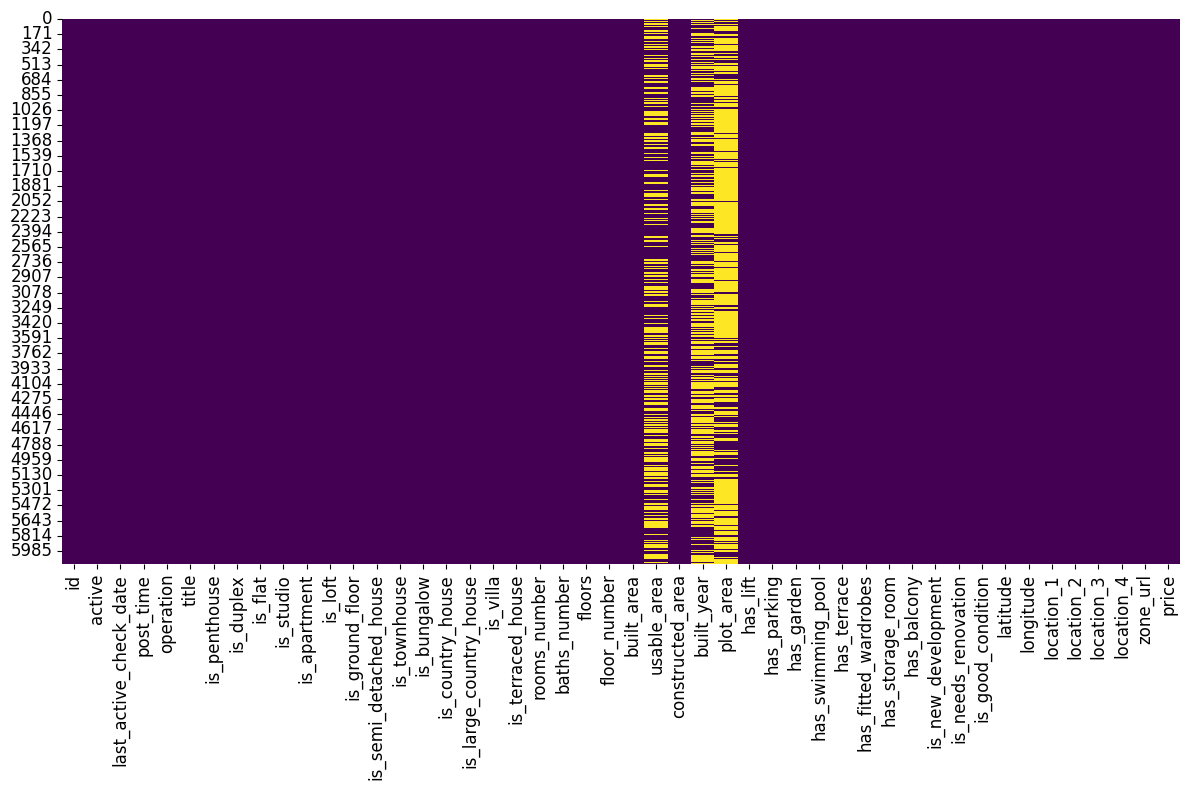

In [5]:
# Plot missing values
plt.figure(figsize=(12, 8))
sns.heatmap(housing.isnull(), cbar=False, cmap='viridis')
save_fig("missing_values")
plt.show()

Saving figure nullity_matrix


C:\Users\Alex\AppData\Local\Temp\ipykernel_6648\212097186.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


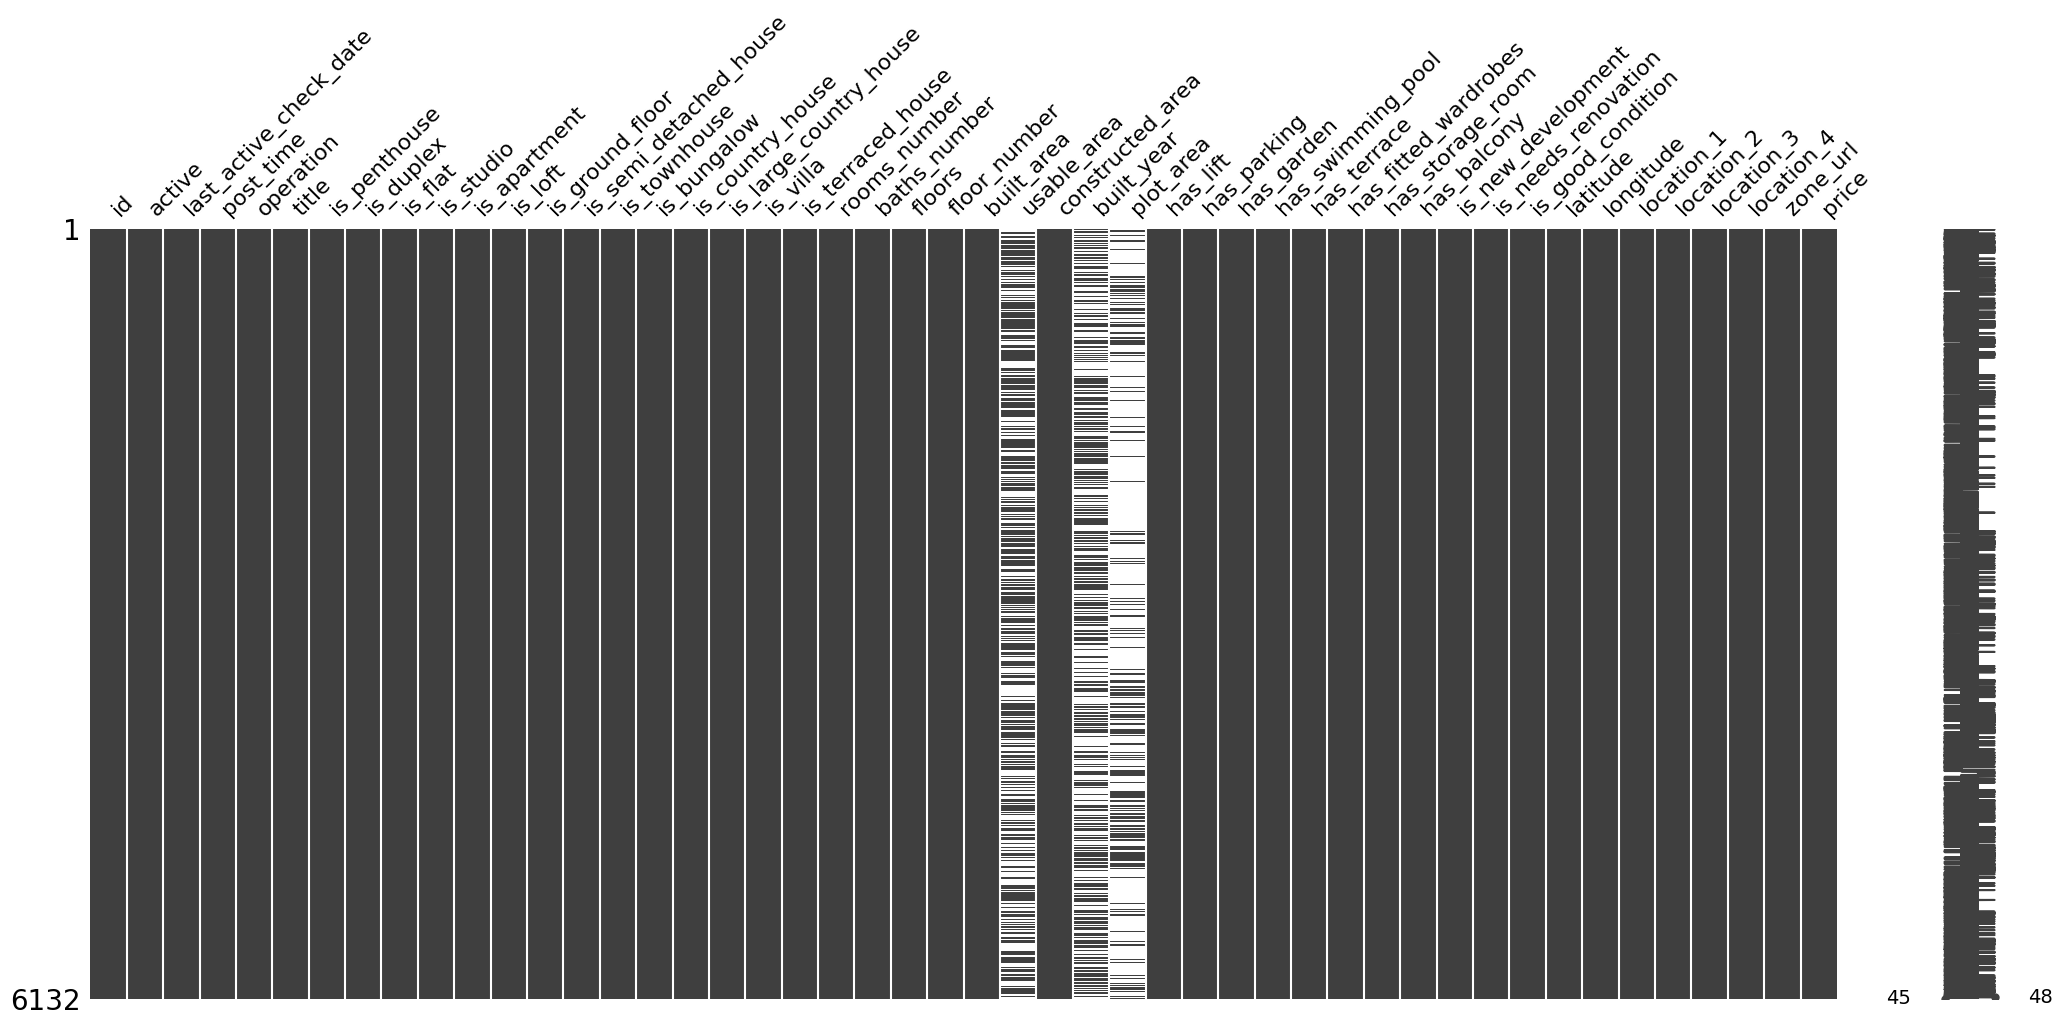

In [6]:
import missingno as msno

# Plot nullity matrix
msno.matrix(housing)
save_fig("nullity_matrix")
plt.show()

In [7]:
numeric_columns = ['usable_area', 'built_year', 'plot_area']
imputer_numeric = SimpleImputer(strategy='mean')
housing[numeric_columns] = imputer_numeric.fit_transform(housing[numeric_columns])

In [8]:
housing.isnull().sum()

id                        0
active                    0
last_active_check_date    0
post_time                 0
operation                 0
title                     0
is_penthouse              0
is_duplex                 0
is_flat                   0
is_studio                 0
is_apartment              0
is_loft                   0
is_ground_floor           0
is_semi_detached_house    0
is_townhouse              0
is_bungalow               0
is_country_house          0
is_large_country_house    0
is_villa                  0
is_terraced_house         0
rooms_number              0
baths_number              0
floors                    0
floor_number              0
built_area                0
usable_area               0
constructed_area          0
built_year                0
plot_area                 0
has_lift                  0
has_parking               0
has_garden                0
has_swimming_pool         0
has_terrace               0
has_fitted_wardrobes      0
has_storage_room    

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6132 entries, 0 to 6131
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6132 non-null   int64  
 1   active                  6132 non-null   int64  
 2   last_active_check_date  6132 non-null   object 
 3   post_time               6132 non-null   object 
 4   operation               6132 non-null   int64  
 5   title                   6132 non-null   object 
 6   is_penthouse            6132 non-null   int64  
 7   is_duplex               6132 non-null   int64  
 8   is_flat                 6132 non-null   int64  
 9   is_studio               6132 non-null   int64  
 10  is_apartment            6132 non-null   int64  
 11  is_loft                 6132 non-null   int64  
 12  is_ground_floor         6132 non-null   int64  
 13  is_semi_detached_house  6132 non-null   int64  
 14  is_townhouse            6132 non-null   

## Work with date columns

In [10]:
housing['last_active_check_date'].value_counts()

2023-12-11 17:30:48.181553    3
2023-12-11 17:31:47.058265    3
2023-12-11 17:22:17.281188    3
2023-12-11 17:22:36.908139    3
2023-12-11 17:17:27.813457    2
                             ..
2023-12-11 17:31:40.016486    1
2023-12-11 17:31:39.899091    1
2023-12-11 17:31:40.010556    1
2023-12-11 17:31:39.971085    1
2023-12-11 22:38:04.643591    1
Name: last_active_check_date, Length: 6052, dtype: int64

In [11]:
housing['post_time'].value_counts()

2023-12-07 15:25:47.175000    3
2023-12-07 15:42:30.939000    3
2023-12-07 13:56:03.770000    3
2023-12-07 13:54:03.291000    3
2023-12-07 13:10:06.731000    2
                             ..
2023-12-07 15:39:41.054000    1
2023-12-07 15:39:35.473000    1
2023-12-07 15:39:33.482000    1
2023-12-07 15:39:31.154000    1
2023-12-11 22:38:04.431000    1
Name: post_time, Length: 6052, dtype: int64

In [12]:
# Drop last_active_check_date as it is not needed for the analysis
housing = housing.drop(columns=['last_active_check_date'], axis=1)

In [13]:
housing['post_time'] = pd.to_numeric(pd.to_datetime(housing['post_time']).dt.strftime('%Y%m'))

In [14]:
housing['post_time'].value_counts()

202312    6132
Name: post_time, dtype: int64

In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6132 entries, 0 to 6131
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6132 non-null   int64  
 1   active                  6132 non-null   int64  
 2   post_time               6132 non-null   int64  
 3   operation               6132 non-null   int64  
 4   title                   6132 non-null   object 
 5   is_penthouse            6132 non-null   int64  
 6   is_duplex               6132 non-null   int64  
 7   is_flat                 6132 non-null   int64  
 8   is_studio               6132 non-null   int64  
 9   is_apartment            6132 non-null   int64  
 10  is_loft                 6132 non-null   int64  
 11  is_ground_floor         6132 non-null   int64  
 12  is_semi_detached_house  6132 non-null   int64  
 13  is_townhouse            6132 non-null   int64  
 14  is_bungalow             6132 non-null   

## Work with columns contain string type

In [16]:
housing['location_1'].value_counts()

Gran Canaria, Las Palmas    6132
Name: location_1, dtype: int64

In [17]:
housing['location_2'].value_counts()

Las Palmas de Gran Canaria             2116
San Bartolomé de Tirajana               987
Mogán                                   591
Telde                                   506
Santa Lucía de Tirajana                 385
Arucas                                  226
Santa Brigida                           226
Ingenio                                 203
Agüimes                                 152
Gáldar                                  126
Teror                                   114
Santa Maria de Guia de Gran Canaria     103
Moya                                     79
Valsequillo de Gran Canaria              77
Vega de San Mateo                        74
Firgas                                   58
Aldea de San Nicolás                     42
Valleseco                                27
Agaete                                   17
Tejeda                                   15
Artenara                                  8
Name: location_2, dtype: int64

In [18]:
housing['location_3'].value_counts()

Distrito Puerto - Canteras             669
Distrito Ciudad Alta                   468
Distrito Centro                        312
Distrito Playa del Inglés              311
Distrito Tamaraceite - San Lorenzo     291
                                      ... 
Camino del fronton, 145                  1
Calle las Marciegas, 50                  1
Montaña de Guia, 11                      1
Carretera Cral de Guia a la Atalaya      1
El Paso                                  1
Name: location_3, Length: 483, dtype: int64

In [19]:
housing['location_4'].value_counts()

Barrio Santa Catalina - Canteras          325
Barrio Arenales - Lugo - Avda Marítima    199
Barrio Guanarteme                         174
Barrio La Isleta                          170
Barrio Tamaraceite                        135
                                         ... 
Avenida Lechugal                            1
Avenida del Guincho, 25                     1
Calle petrel, 3                             1
Urb. PLAYA DEL CURA, EL CARDENAL            1
El hoyo, 11                                 1
Name: location_4, Length: 2843, dtype: int64

In [20]:
housing['zone_url'].value_counts()


https://www.idealista.com/venta-viviendas/las-palmas-de-gran-canaria/puerto-canteras/santa-catalina-canteras    325
https://www.idealista.com/venta-viviendas/san-bartolome-de-tirajana/playa-del-ingles                            311
https://www.idealista.com/venta-viviendas/las-palmas-de-gran-canaria/centro/arenales-lugo-avda-maritima         199
https://www.idealista.com/venta-viviendas/mogan/arguineguin                                                     185
https://www.idealista.com/venta-viviendas/las-palmas/gran-canaria/moya-santa-maria-de-guia                      182
                                                                                                               ... 
https://www.idealista.com/venta-viviendas/ingenio/burrero                                                        11
https://www.idealista.com/venta-viviendas/arucas/tres-barrios-trasmontana                                         7
https://www.idealista.com/venta-viviendas/santa-lucia-de-tirajana/el-doc

Saving figure location_unique_values


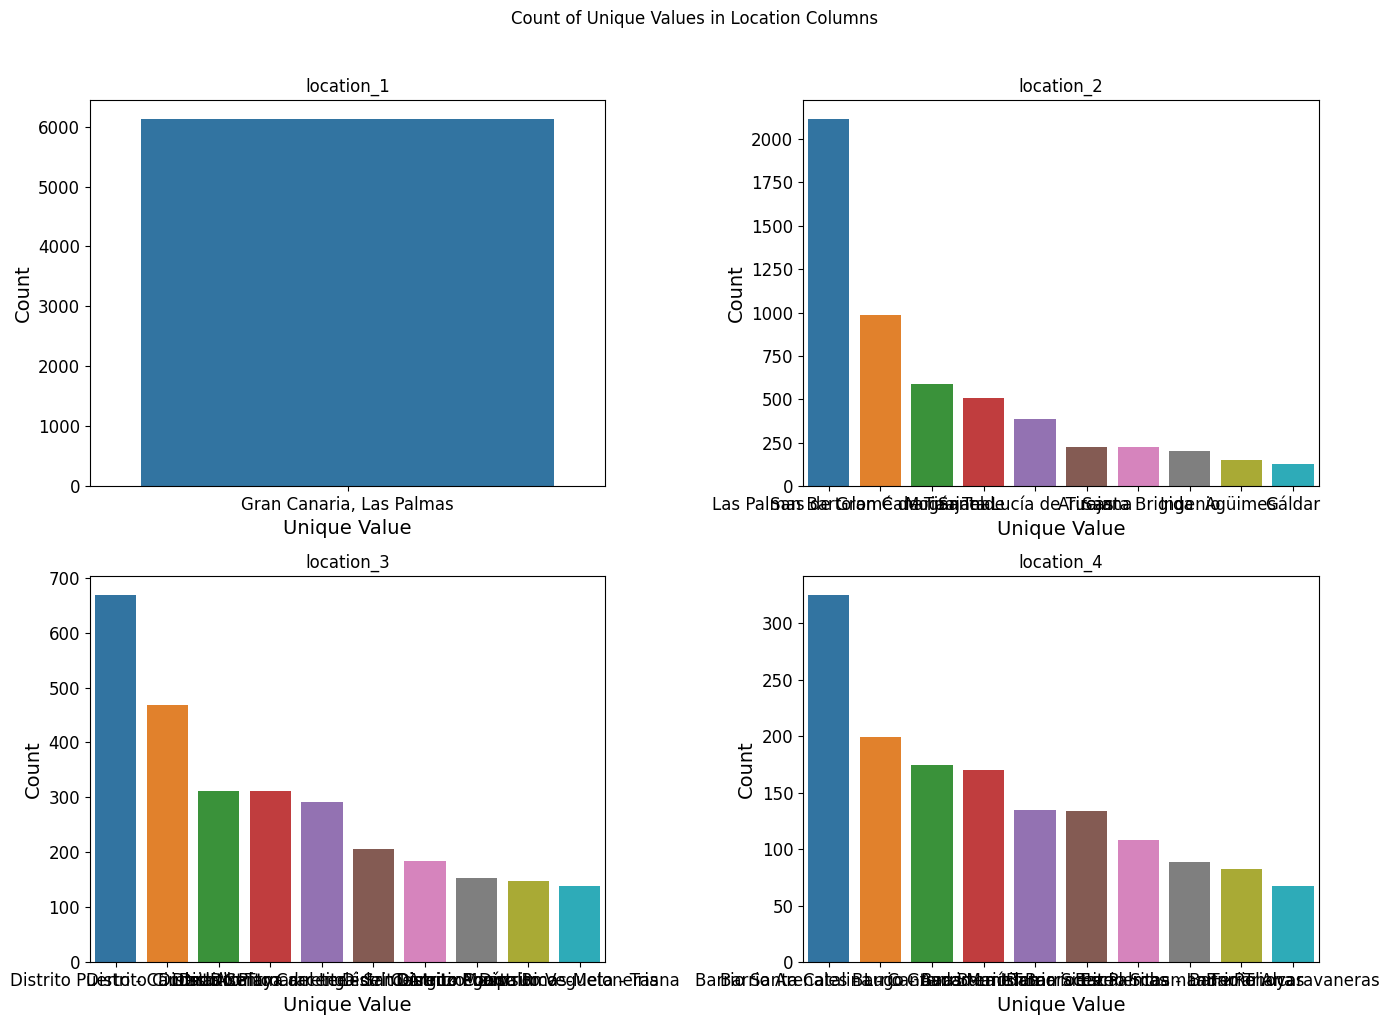

In [21]:
#Now we will see the number of the unique values in each location column
location_columns = ['location_1', 'location_2', 'location_3', 'location_4']

# Plot the count of unique values in each location column
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Count of Unique Values in Location Columns', y=1.02)

for col, ax in zip(location_columns, axes.flatten()):
    sns.countplot(x=col, data=housing, ax=ax, order=housing[col].value_counts().index[:10])
    ax.set_title(col)
    ax.set_xlabel('Unique Value')
    ax.set_ylabel('Count')

plt.tight_layout()
save_fig("location_unique_values")
plt.show()

Saving figure unique_location_counts


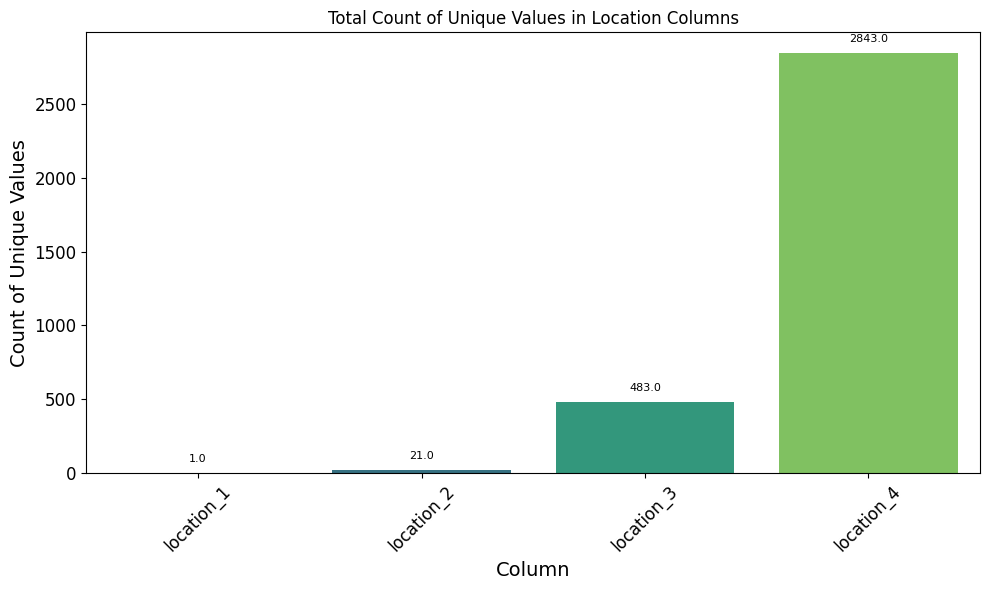

In [22]:
# Get the total unique values for each column
unique_counts = housing[location_columns].nunique()

# Plot the total count of unique values in each location column with annotations
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='viridis')

# Annotate each bar with its count
for p in barplot.patches:
    barplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Total Count of Unique Values in Location Columns')
plt.xlabel('Column')
plt.ylabel('Count of Unique Values')
plt.xticks(rotation=45)
save_fig("unique_location_counts")
plt.show()

As we have a lot of unique values in location_4 and zone_url we will drop it as we use latitude and longitude as a base of exact location wich will help us in the futere to add the option to see by location of nearest services, TITLE column will be droped as well

In [23]:
housing = housing.drop(columns=['title', 'location_4', 'zone_url'], axis=1)

In [24]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6132 entries, 0 to 6131
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6132 non-null   int64  
 1   active                  6132 non-null   int64  
 2   post_time               6132 non-null   int64  
 3   operation               6132 non-null   int64  
 4   is_penthouse            6132 non-null   int64  
 5   is_duplex               6132 non-null   int64  
 6   is_flat                 6132 non-null   int64  
 7   is_studio               6132 non-null   int64  
 8   is_apartment            6132 non-null   int64  
 9   is_loft                 6132 non-null   int64  
 10  is_ground_floor         6132 non-null   int64  
 11  is_semi_detached_house  6132 non-null   int64  
 12  is_townhouse            6132 non-null   int64  
 13  is_bungalow             6132 non-null   int64  
 14  is_country_house        6132 non-null   

As we dont have to many unique values in every location we will use dummies
But first we will remove special characters from the location_3 column

In [25]:
# Define the characters to remove
characters_to_remove = '[,;/.\\!0-9]'

# Replace characters in all object columns
housing_object_columns = housing.select_dtypes(include='object').columns
housing[housing_object_columns] = housing[housing_object_columns].apply(lambda x: x.str.replace(characters_to_remove, '', regex=True))

# Now, you can proceed with one-hot encoding
housing = pd.get_dummies(housing, columns=['location_1', 'location_2', 'location_3'], drop_first=True)

Now we check if the data has only numeric values and it is ready to be trained

In [26]:
is_numeric = housing.select_dtypes(include='number').shape[1] == housing.shape[1]

if is_numeric:
    print("The DataFrame contains only numeric values.")
else:
    print("The DataFrame has non-numeric columns.")

The DataFrame contains only numeric values.


# Create and Train the model

In [27]:
# Define X and y
X = housing.drop(columns='price', axis=1)
y = housing['price']

In [28]:
len(X), len(y)

(6132, 6132)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Define the parameter grid for regression
model_params = {
    'linear_regression':{
        'model':LinearRegression(),
        'params':{
            'fit_intercept': [True, False],
            'n_jobs': [-1],
            'copy_X': [True, False]
        }
    },
    'random_forest_regression':{
        'model':RandomForestRegressor(random_state=42),
        'params':{
            'n_estimators': [50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'gradient_boosting_regression':{
        'model':GradientBoostingRegressor(random_state=42),
        'params':{
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    }
}

In [31]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [32]:
results = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
results

,model,best_score,best_params
0,linear_regression,0.379501,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,random_forest_regression,0.705287,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_..."
2,gradient_boosting_regression,0.693259,"{'learning_rate': 0.1, 'max_depth': 5, 'min_sa..."


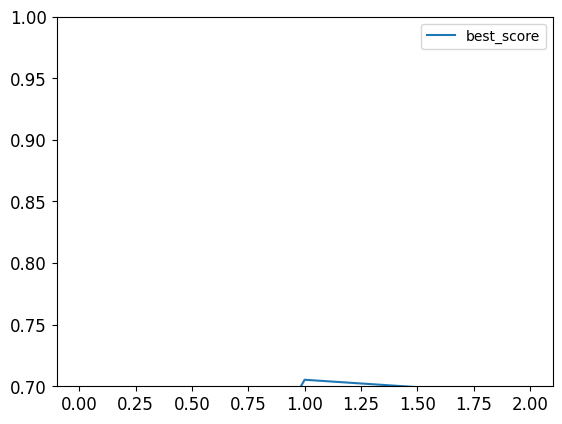

In [33]:
plot_results = results.plot(ylim=(0.7, 1.0))

### Plot the actual and predicted

In [36]:
best_model_index = results['best_score'].idxmax()

# Get the best model and its parameters
best_model_name = results.loc[best_model_index, 'model']
best_model = model_params[best_model_name]['model']
best_model_params = results.loc[best_model_index, 'best_params']

best_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Saving figure actual_vs_predicted_prices_colored


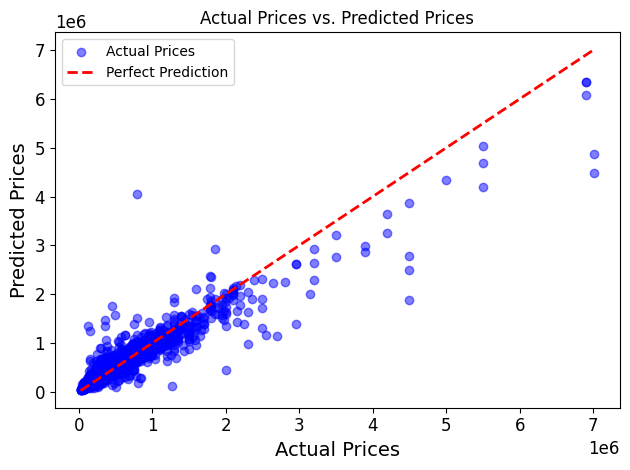

In [42]:
all_predictions = best_model.predict(X)

# Scatter plot with colors
plt.scatter(y, all_predictions, alpha=0.5, c='blue', label='Actual Prices', marker='o')
plt.plot([min(y), max(y)], [min(y), max(y)], '--', lw=2, c='red', label='Perfect Prediction')  # Diagonal line for perfect prediction
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.legend()
save_fig("actual_vs_predicted_prices_colored")
plt.show()


In [40]:
# Add new column in the csv with predicted prices

# Load the original dataset
houses_to_updated = pd.read_csv('completed_houses.csv')

# Add the predicted prices as a new column
houses_to_updated['predicted_prices'] = all_predictions

# Save the updated dataset with the predicted prices under a new name
houses_to_updated.to_csv('houses_with_predictions.csv', index=False)

# Saving Best Model

In [45]:
best_model_index = results['best_score'].idxmax()

# Get the best model and its parameters
best_model_name = results.loc[best_model_index, 'model']
best_model = model_params[best_model_name]['model']
best_model_params = results.loc[best_model_index, 'best_params']

best_model.fit(X_test, y_test)

RandomForestRegressor(random_state=42)

In [46]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_model.pkl')

# Load the best model
# loaded_model = joblib.load('best_model.pkl')

# Now you can use the loaded_model for predictions
# predictions = loaded_model.predict(X_new)

['best_model.pkl']